In [1]:
# Download needed dependencies
%pip install tensorflow
%pip install keras

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 3.4 MB/s eta 0:01:56
   ---------------------------------------- 0.8/390.3 MB 2.2 MB/s eta 0:02:54
   --------

In [3]:
# Import needed dependencies
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers, models
import csv
import os
from datetime import datetime

Pre-Processing of FashionMNIST dataset for Image Classification+


In [4]:
# Read in the data:

# Loading Fashion MNIST dataset from TensorFlow datasets
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load training and testing dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# Normalize pixel values of images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check shape of dataset
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


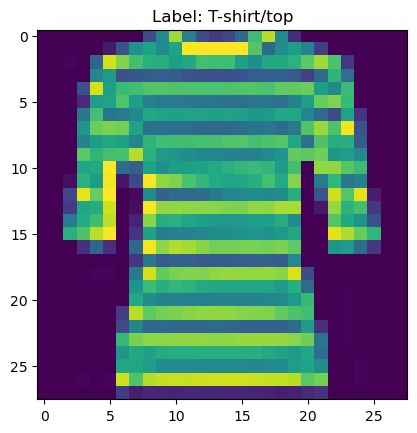

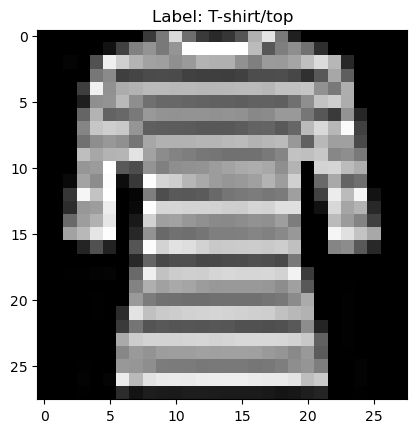

In [6]:
# Defining label names for Fashion MNIST dataset to check images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Checking and displaying images with corresponding labels
    # not all images will be present as I iterated through the image index values to find specific labels
    
# image_index = 10
# image = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 29
# image0 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image0)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 12
# image1 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image1)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 30
# image1 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image1)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 40
# image2 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image2)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 20
# image3 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image3)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 90
# image4 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image4)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 100
# image5 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image5)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 16
# image6 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image6)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

# image_index = 31
# image7 = train_images[image_index, :].reshape((28, 28))
# plt.imshow(image7)
# plt.title(f'Label: {class_names[train_labels[image_index]]}')
# plt.show()

#image from T-shirt/Top label
image_index = 26
image8 = train_images[image_index, :].reshape((28, 28))
plt.imshow(image8)
plt.title(f'Label: {class_names[train_labels[image_index]]}')
plt.show()

#image in greyscale to show how the model reads it in
image_index = 26
image9 = train_images[image_index, :].reshape((28, 28))
plt.imshow(image9, cmap='grey')
plt.title(f'Label: {class_names[train_labels[image_index]]}')
plt.show()